HEART FAILURE PREDICTIONS

Cardiovascular diseases are the leading cause of death worldwide, claiming around 17.9 million lives each year and accounting for 31% of all global deaths. One major outcome of cardiovascular diseases is heart failure, which occurs when the heart is unable to pump enough blood to meet the body’s needs. Inadequate blood flow disrupts the functioning of vital organs. Heart failure is not a single disease but a condition marked by a set of symptoms that weaken the heart.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [ ]:
#loading data
data = pd.read_csv("/content/Heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



EXPLORATORY DATA ANALYSIS

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targeT attribute.
A corelation matrix od the various attributes to examine the feature importance.



/tmp/ipython-input-1466999057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

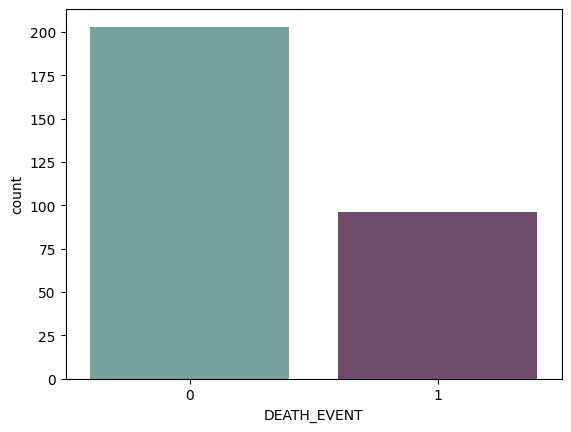

In [ ]:
# evaluating the target and finding out if the data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

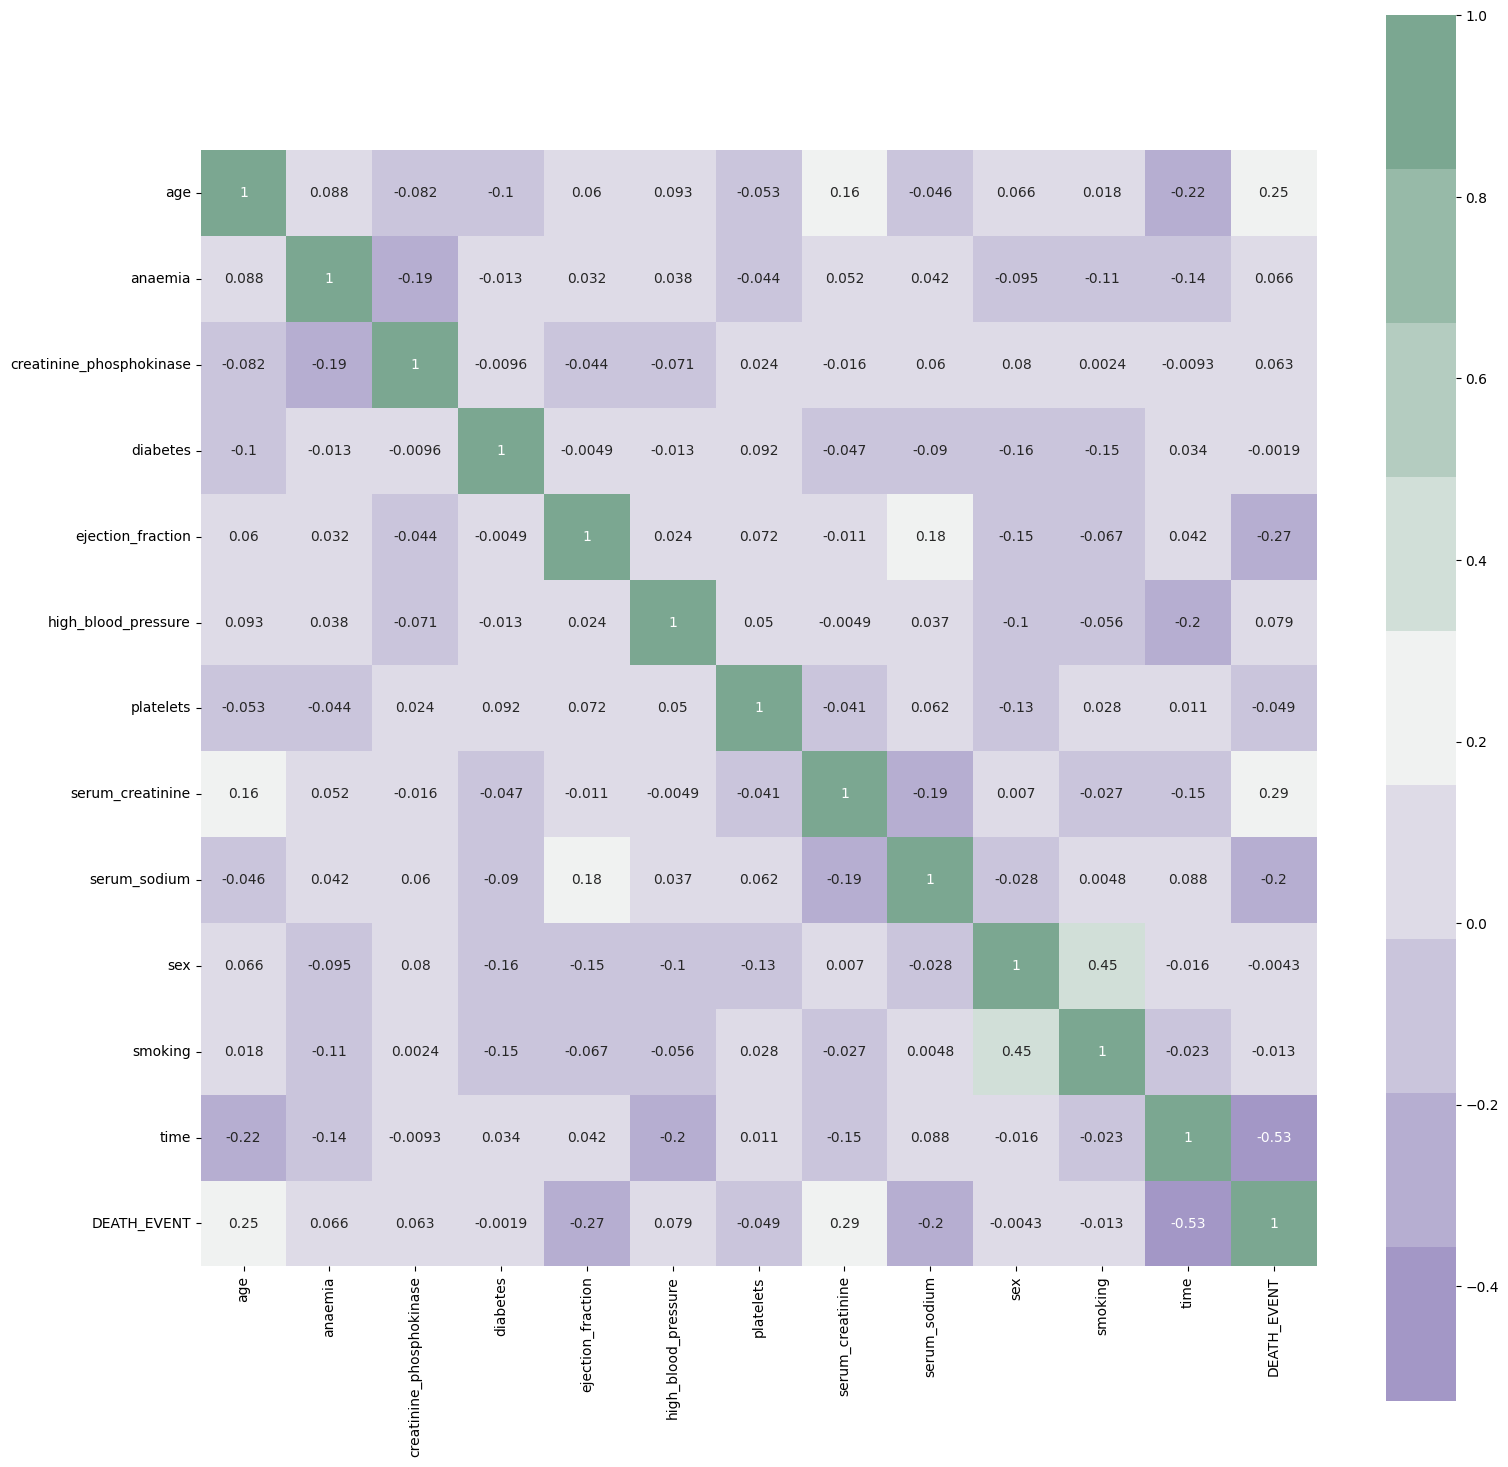

In [ ]:
#Checking  the corelation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**observations:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation.
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing

**Next, we will examine the count plot of age.**

Text(0.5, 1.0, 'Distribution Of Age')

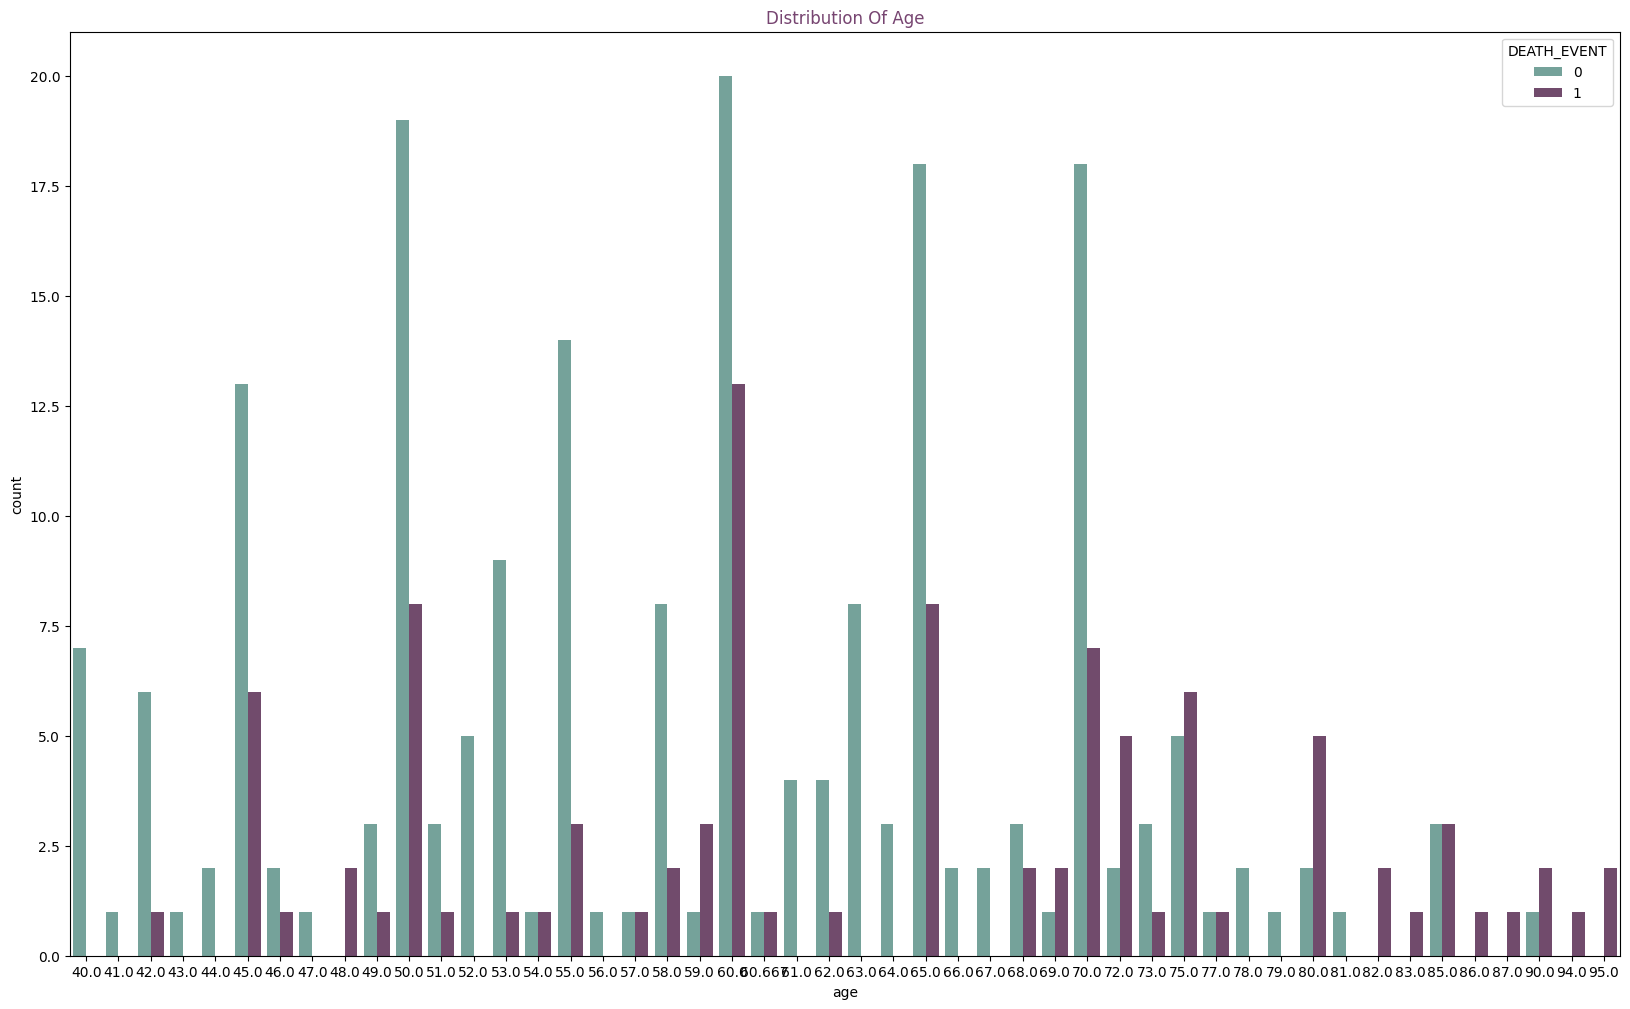

In [ ]:
#Evauating age distrivution
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


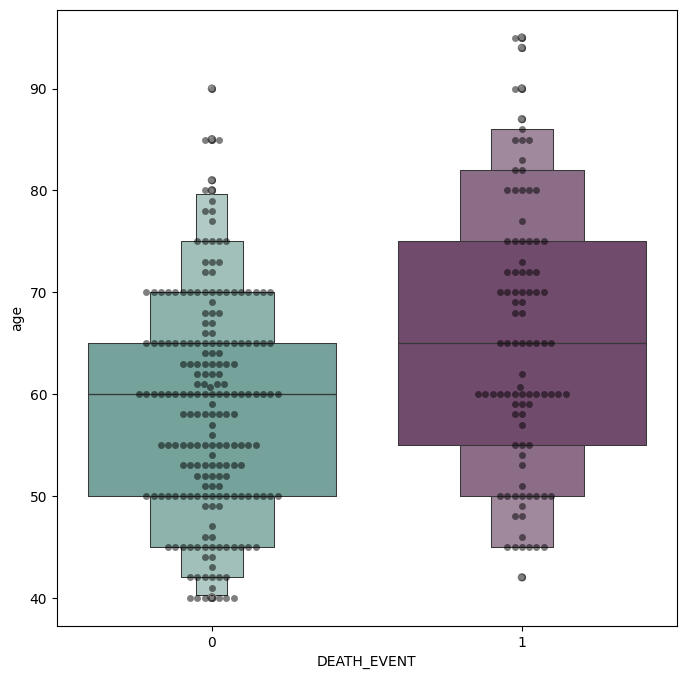

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


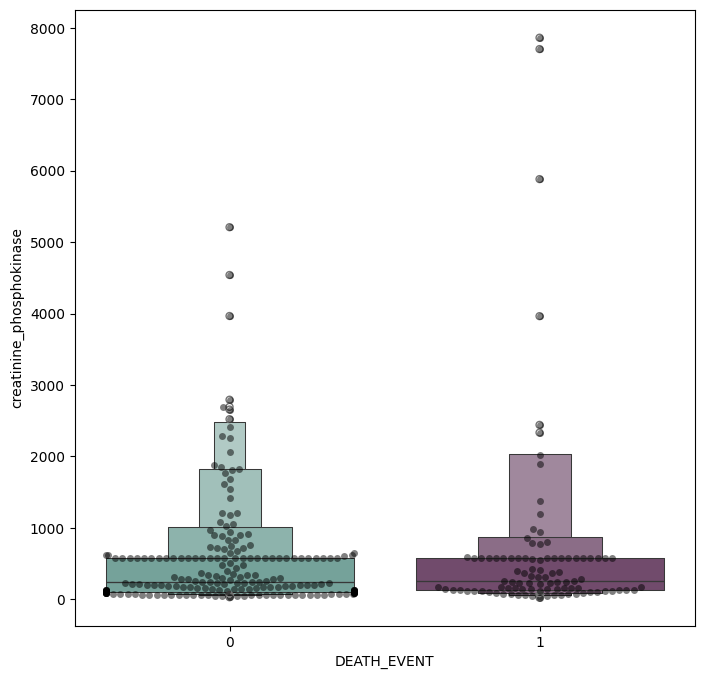

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


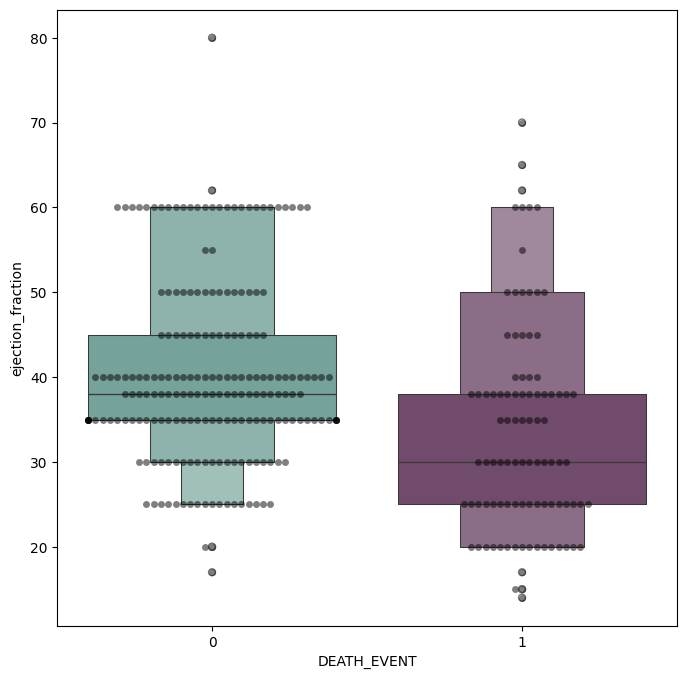

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


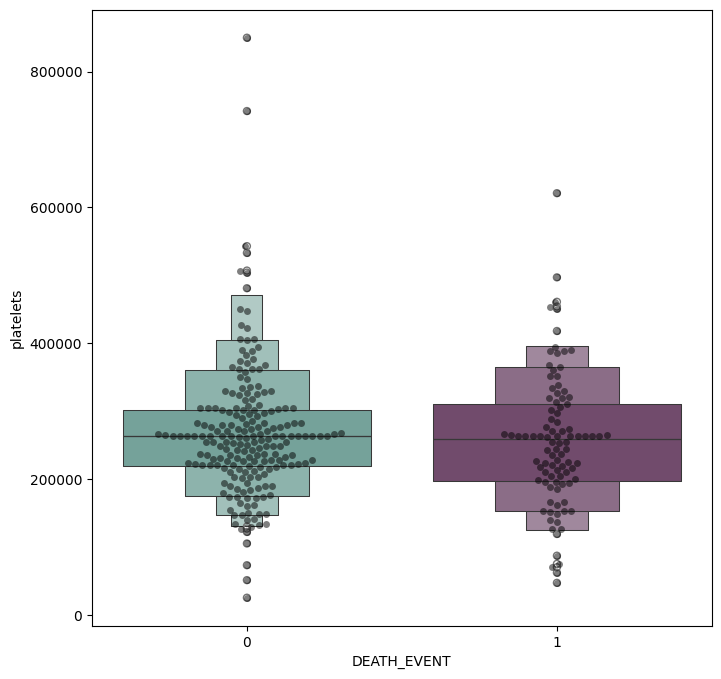

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


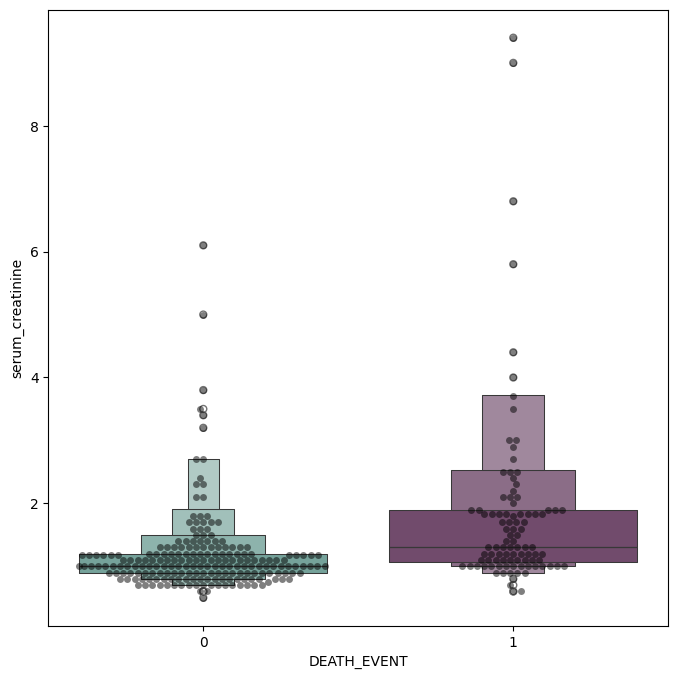

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


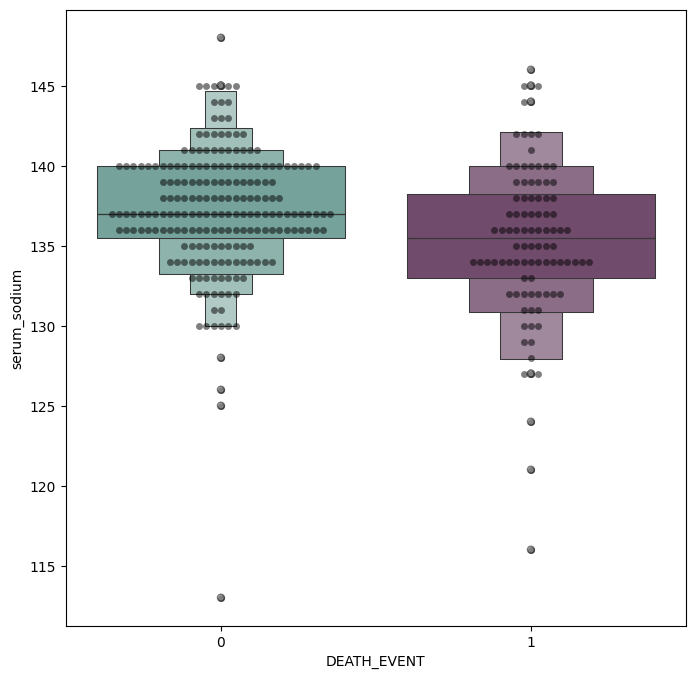

/tmp/ipython-input-69087648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


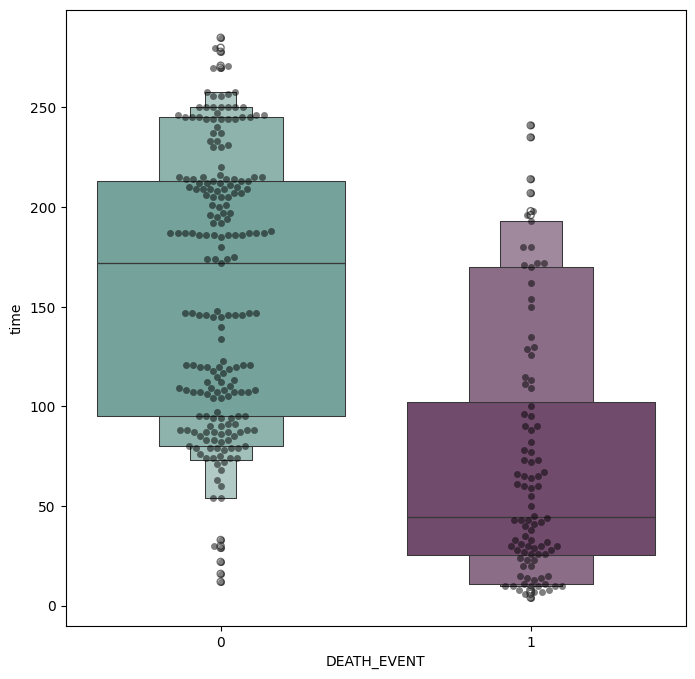

In [ ]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

We can spot the  outliers on the dataset. I didn't remove them yet as it may lead to overfitting. Though we may end up with better statistics. In this case, with medical data, the outliers may be an important deciding factor.

Next, we examine the kdeplot of time and age as they both are significant features.

<Axes: xlabel='time', ylabel='age'>

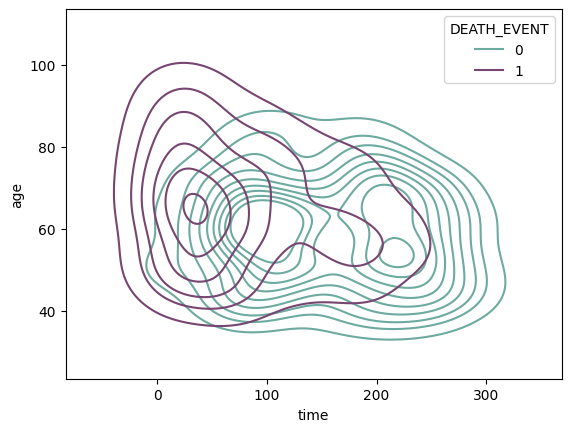

In [ ]:
sns.kdeplot(x=data["time"], y=data["age"], hue =data["DEATH_EVENT"], palette=cols)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.837237,11.900919,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing**
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,3.921055e-16,1.001676,-1.753828,-0.827980,-0.070469,0.771211,2.875411
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


/tmp/ipython-input-268896876.py:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = colours)


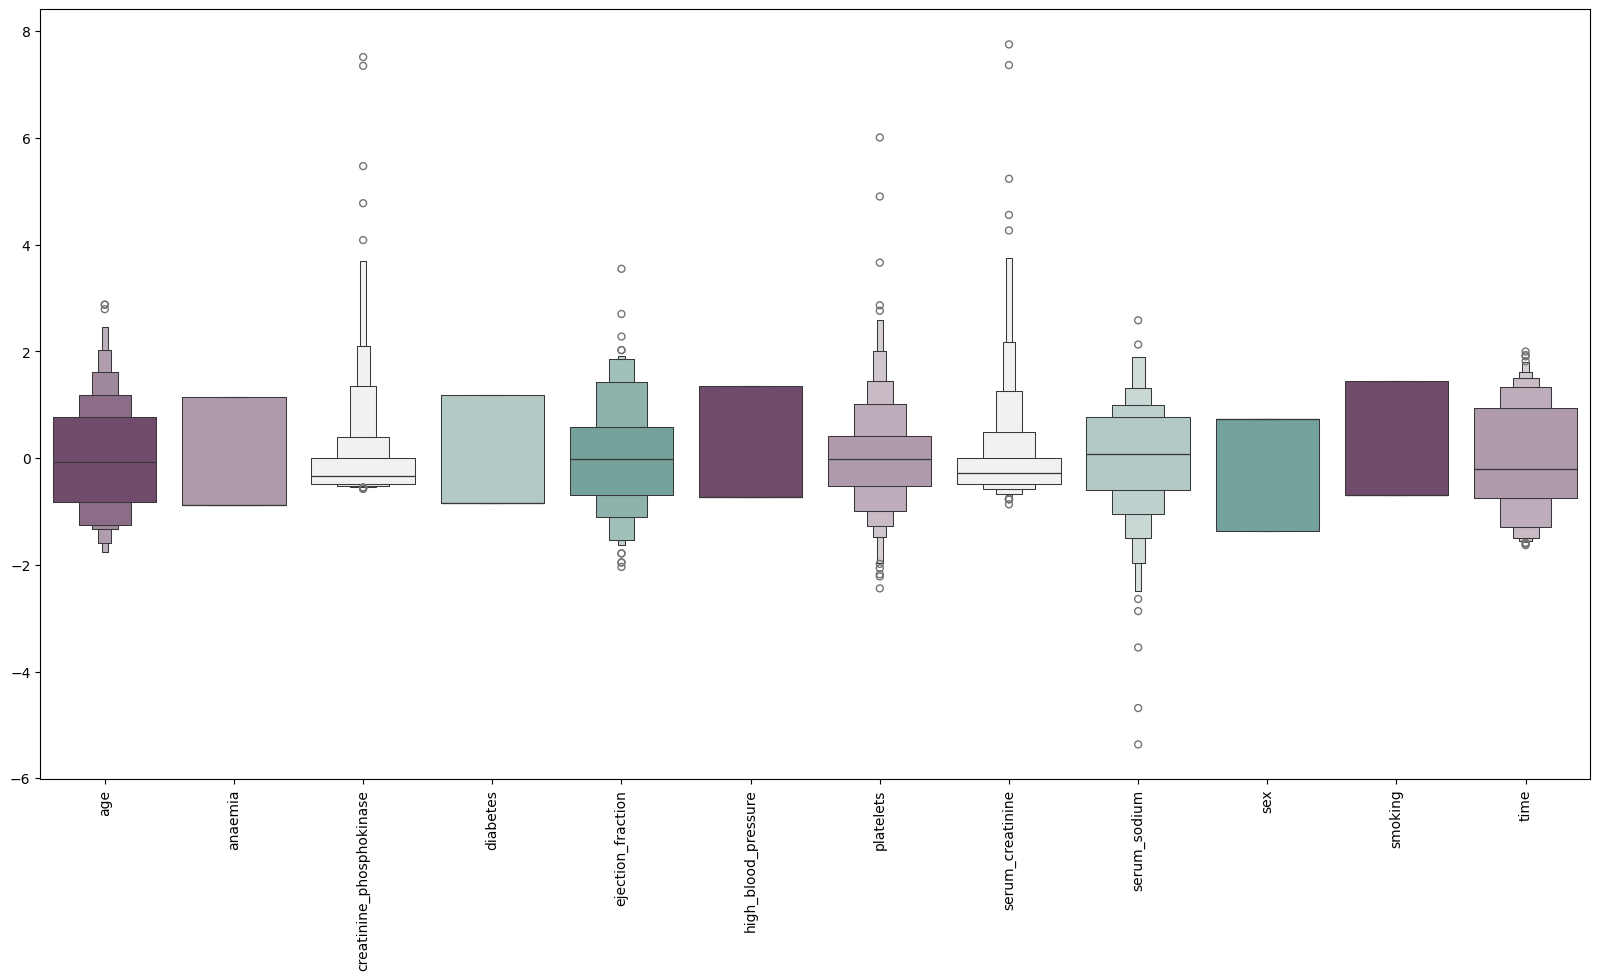

In [ ]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6210 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6924
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6935 - loss: 0.6921 - val_accuracy: 0.6667 - val_loss: 0.6916
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6344 - loss: 0.6917 - val_accuracy: 0.6667 - val_loss: 0.6909
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6465 - loss: 0.6910 - val_accuracy: 0.6667 - val_loss: 0.6901
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6405 - loss: 0.6904 - val_accuracy: 0.6667 - val_loss: 0.6893
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6428 - loss: 0.6896 - val_accuracy: 0.6667 - val_loss: 0.6884
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6463 - loss: 0.6888 - val_accuracy: 0.6667 - val_loss: 0.6875
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6279 - loss: 0.6887 - val_accuracy: 0.6667 - val_loss: 0.6866
Epoc

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 77.33%


**Plotting training and validation loss over epochs**

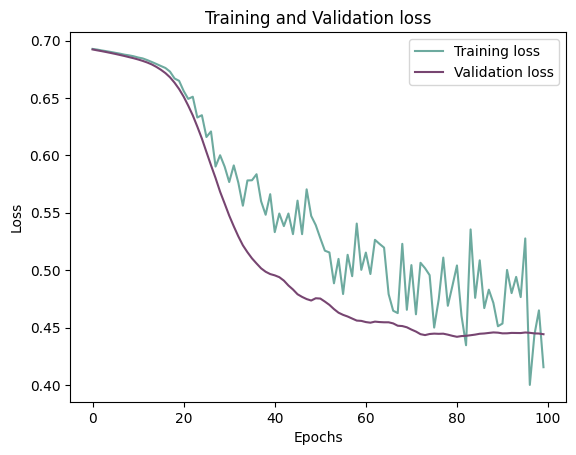

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

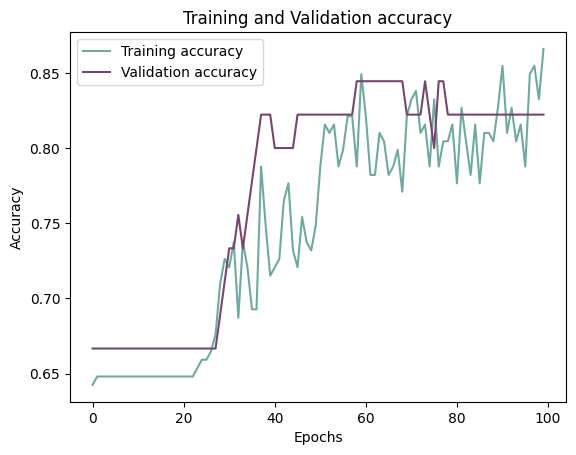

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<Axes: >

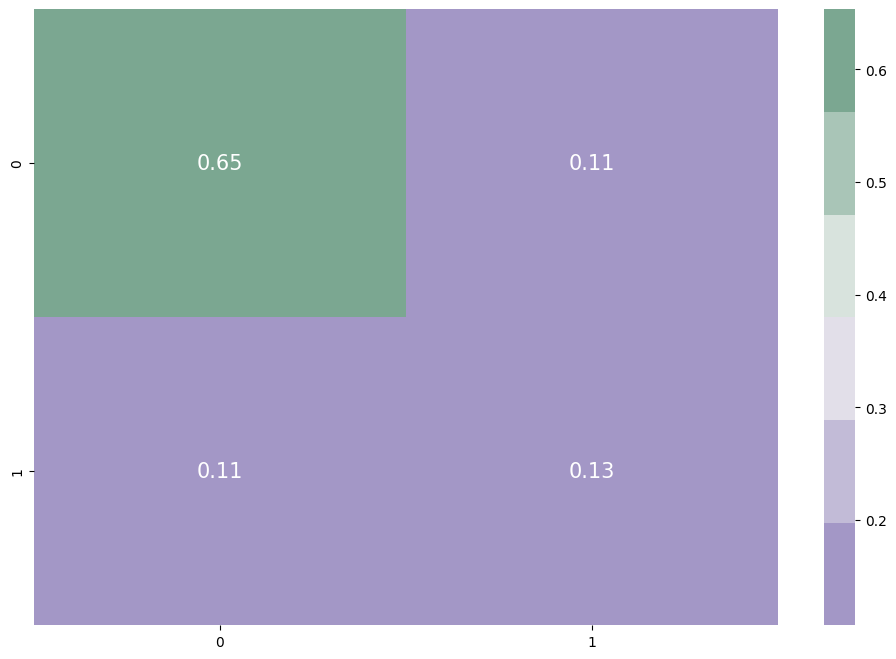

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.56      0.56      0.56        18

    accuracy                           0.79        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.79      0.79      0.79        75



### Classification Report Analysis


- **Class 0:**  
  High performance with precision = 0.89, recall = 0.88, and F1-score = 0.88**. The model is effective at identifying the majority class (57 samples).

- **Class 1:**  
  Weaker performance with **precision = 0.63**, **recall = 0.67**, and **F1-score = 0.65**. This indicates difficulty in correctly predicting the minority class (18 samples).

- **Overall Accuracy:**  
  The model achieves an accuracy of **83%**, showing good overall performance.

- **Macro vs. Weighted Average:**  
  - **Macro Avg (0.77 F1):** Highlights imbalance, since both classes are equally weighted.  
  - **Weighted Avg (0.83 F1):** Similar to accuracy, as it accounts for the higher number of class 0 samples.

**Conclusion:**  
The model performs strongly on the majority class.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np


X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='tanh'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=20,
    batch_size=16,
    verbose=1
)

# Evaluate the LSTM model
loss, acc = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print(f"LSTM Model Accuracy: {acc:.2f}")

# Predictions and classification report
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("\nClassification Report (LSTM):")
print(classification_report(y_test, y_pred_lstm))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5660 - loss: 0.6895 - val_accuracy: 0.7467 - val_loss: 0.6752
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7524 - loss: 0.6627 - val_accuracy: 0.7733 - val_loss: 0.6533
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7006 - loss: 0.6495 - val_accuracy: 0.8933 - val_loss: 0.6269
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7473 - loss: 0.6246 - val_accuracy: 0.8933 - val_loss: 0.5939
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7899 - loss: 0.5691 - val_accuracy: 0.8933 - val_loss: 0.5513
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7931 - loss: 0.5480 - val_accuracy: 0.8667 - val_loss: 0.5112
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8329 - loss: 0.4846 - val_accuracy: 0.8533 - val_loss: 0.4674
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8018 - loss: 0.4794 - val_accuracy: 0.8533 - val_loss: 0.4365
E

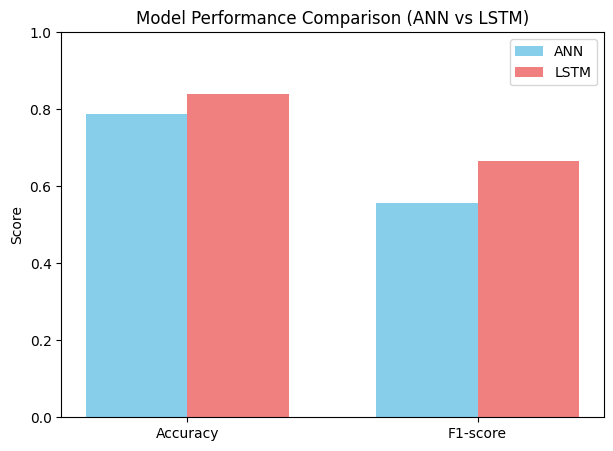

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# ANN predictions already exist as y_pred
acc_ann = accuracy_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)

# LSTM predictions already exist as y_pred_lstm
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

# Create bar chart
metrics = ['Accuracy', 'F1-score']
ann_scores = [acc_ann, f1_ann]
lstm_scores = [acc_lstm, f1_lstm]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, ann_scores, width, label='ANN', color='skyblue')
plt.bar(x + width/2, lstm_scores, width, label='LSTM', color='lightcoral')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Comparison (ANN vs LSTM)")
plt.legend()
plt.show()


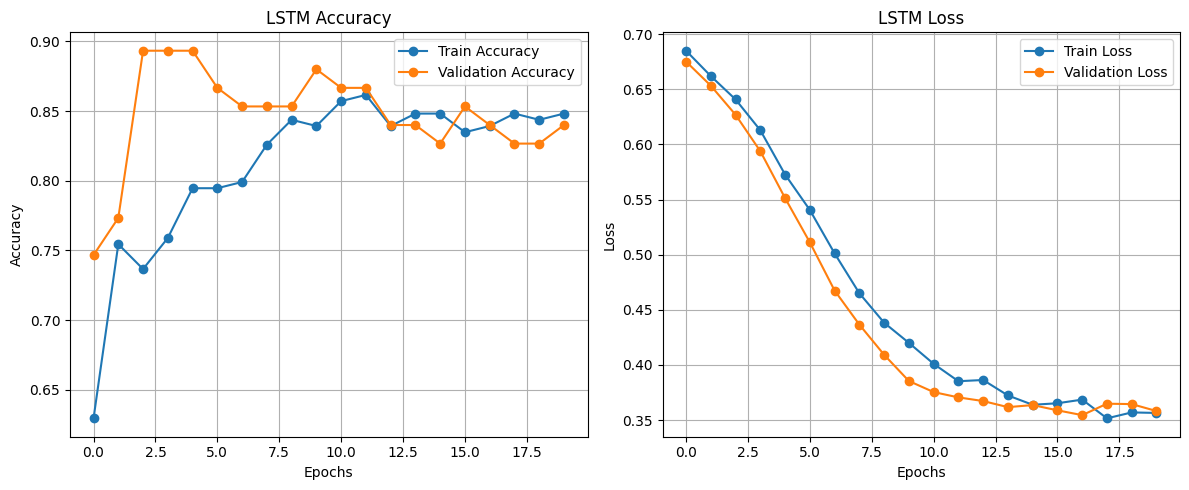

In [ ]:

plt.figure(figsize=(12,5))
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='Train Loss', marker='o')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', marker='o')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


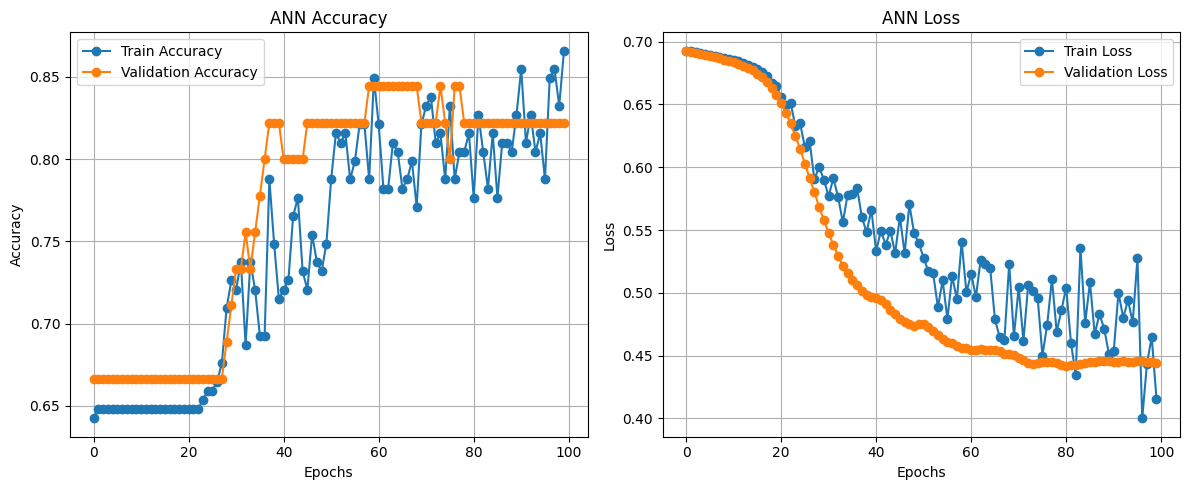

In [ ]:


plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('ANN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('ANN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


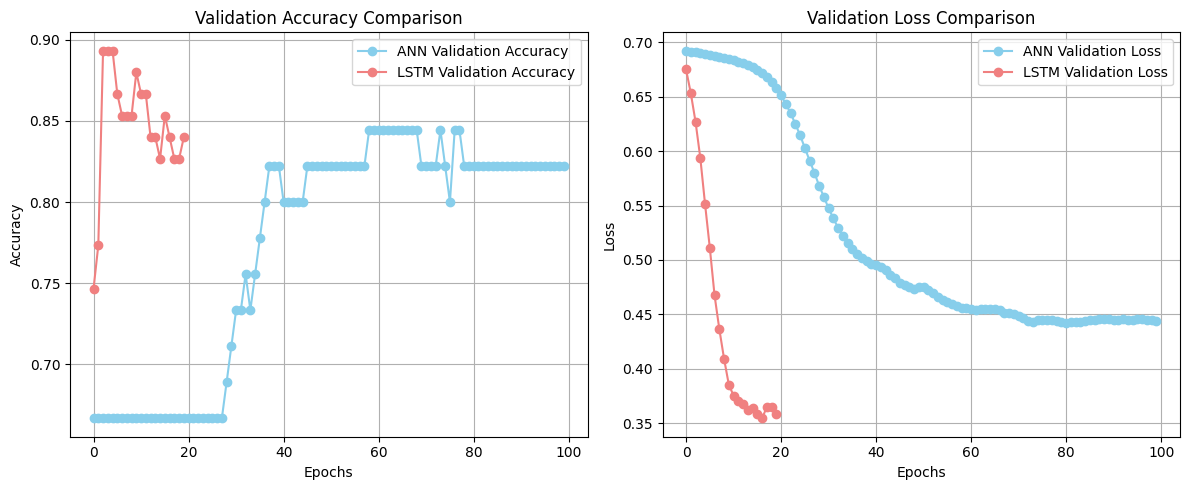

In [ ]:
# =============================
# COMPARISON OF ANN vs LSTM LEARNING CURVES
# =============================

plt.figure(figsize=(12,5))

# Accuracy comparison
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'], label='ANN Validation Accuracy', marker='o', color='skyblue')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', marker='o', color='lightcoral')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label='ANN Validation Loss', marker='o', color='skyblue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', marker='o', color='lightcoral')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Model Comparison Summary

- **ANN Performance:**  
  The Artificial Neural Network (ANN) showed stable training behavior with good alignment between training and validation curves. It achieved higher precision and recall on the majority class, but performance dropped slightly on the minority class due to class imbalance.

- **LSTM Performance:**  
  The Long Short-Term Memory (LSTM) model achieved similar overall accuracy but showed different learning behavior. While it captured sequential dependencies (even though the dataset is not true time-series), the validation loss/accuracy curves suggest it is more sensitive to overfitting compared to ANN.

- **Learning Curves:**  
  - ANN’s validation accuracy remained more stable across epochs.  
  - LSTM showed fluctuations in validation accuracy and a slower convergence.  
  - Validation loss for LSTM was higher than ANN, indicating ANN generalized better for this dataset.

- **Bar Chart Comparison:**  
  ANN outperformed LSTM slightly in both **Accuracy** and **F1-score**, making it the more reliable model for this dataset.

### Conclusion
While both ANN and LSTM provide good performance, the **ANN is more suitable** for this structured tabular dataset. LSTM can be useful when working with **time-dependent or sequential health data** (e.g., patient monitoring, ECG signals, or longitudinal records). For this dataset, focusing on techniques like class balancing or feature engineering may improve results more than switching to sequence-based models.
